### Generating fake profiles using rule - “People between the ages 10-35 who have Asthma”

In [1]:
profile = {'profile1' : "People between the ages 10-35 who have Asthma"}

#### Building GenerationRuleSet function

In [2]:
import pandas as pd
import numpy as np
from itertools import cycle

def GenerationRuleSet(my_profile,size, cols, col_names = None, intervals = None, seed = None):
    

    # Building the columns for profile set    
    categories_dict = {'disease': ['ckd', 'liverissue', 'Dementia', 'cancer', 'Heartdisease', 'asthma', 'asthma', 'asthma', 'Diabetes', 'mentalhealth', 'lungcancer', 'asthma', 'asthma', 'asthma', 'cold'],
                       'names'  : ['James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Michael', 'Linda', 'William', 'Elizabeth', 'Ahmed', 'Barbara', 'Richard', 'Susan', 'Salomon', 'Juan Luis'],
                       'cities' : ['NewSouthWales', 'Victoria', 'Queensland', 'SouthAustralia', 'WesternAustralia', 'Tasmania', 'NorthernTerritory', 'CapitalTerritory', 'Adelaide', 'Melbourne', 'Sydney', 'Brisbane', 'Darwin', 'Canberra', 'Canberra'],
                       'age' : [35, 11, 23, 32, 10, 15, 18, 29, 25, 28 ,16, 14, 14 ,23 ,32]
                      }
    
    # Setting intervals to controls the fake values for each datatype
    default_intervals = {"i" : (10,60), "f" : (0,100), "c" : ("names", 15), "d" : ("2022-01-01","2022-12-31")}
    rng = np.random.default_rng(seed)

    first_c = default_intervals["c"][0]
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])

    # Check the length of profile template
    if isinstance(col_names,list):
        assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
    
    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

    if isinstance(intervals,list):
        assert len(intervals) == len(cols), f"The fake DataFrame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements"
    
    else:
        if isinstance(intervals,dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        intervals = [default_intervals[col] for col in cols]
    df = pd.DataFrame()
    
    # Building the fake profile dataframe and return to main function
    for col, col_name, interval in zip(cols, col_names, intervals):
        
        if interval is None:
            interval = default_intervals[col]
        
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        
        if col in ("i","f","d"):
            start, end = interval
        
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        
        elif col == "c":
            
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
            
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)
                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = False, shuffle = True)
            
            df[col_name] = rng.choice(categories, size, shuffle = True)
        elif col == "d":
            
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    return df


### The code starts here - main function to build the specific profile

In [3]:

# For testing profile1 is set to run without manual input
my_profile = 'profile1'

df_profile = GenerationRuleSet(my_profile, size = 50000, cols =  "ciccd")

print("***************** Here is the generic profile data *****************" + "\n")

if profile[my_profile] == 'People between the ages 10-35 who have Asthma':
    df_profile.rename(columns ={'column_0_cat':'name', 'column_1_int':'age','column_2_cat':'disease','column_3_cat':'city','column_4_date':'last_tested'}, inplace = True)
    print(df_profile)
    print()
    print("------------ Statistical Distribution of Generic Profile ------------")
    print()
    print(df_profile.describe())
else:
    print('Profile did not Match')

***************** Here is the generic profile data *****************

            name  age     disease               city last_tested
0           John   52      asthma           Adelaide  2022-09-17
1       Patricia   56      cancer   WesternAustralia  2022-04-11
2       Patricia   49      asthma     SouthAustralia  2022-09-26
3       Patricia   19         ckd           Canberra  2022-02-19
4      Juan Luis   23      asthma  NorthernTerritory  2022-06-12
...          ...  ...         ...                ...         ...
49995      Linda   25    Dementia           Canberra  2022-09-12
49996   Patricia   17  liverissue           Brisbane  2022-02-18
49997      Linda   46      asthma           Canberra  2022-11-19
49998    Michael   15      asthma           Canberra  2022-11-23
49999    Barbara   14    Diabetes           Canberra  2022-11-19

[50000 rows x 5 columns]

------------ Statistical Distribution of Generic Profile ------------

                age
count  50000.000000
mean      34

#### Checking asthma patients

In [4]:
print("To build data for", profile[my_profile], ": Checking the count of various patient groups" + ".\n")
df_profile['disease'].value_counts()

To build data for People between the ages 10-35 who have Asthma : Checking the count of various patient groups.



asthma          20198
ckd              3368
Heartdisease     3367
cold             3337
Diabetes         3321
liverissue       3320
lungcancer       3297
Dementia         3284
cancer           3256
mentalhealth     3252
Name: disease, dtype: int64

### People between the ages 10-35 who have Asthma

In [5]:
df_asthma_profile = df_profile[(df_profile['age'] >=10) & (df_profile['age'] <= 35) & (df_profile['disease'] == 'asthma')]
print("People between the ages 10-35 who have Asthma:", df_asthma_profile.shape)
print()
print(df_asthma_profile)

People between the ages 10-35 who have Asthma: (10426, 5)

            name  age disease               city last_tested
4      Juan Luis   23  asthma  NorthernTerritory  2022-06-12
9          Ahmed   29  asthma   WesternAustralia  2022-04-23
11       Barbara   28  asthma           Victoria  2022-09-13
14        Robert   33  asthma             Darwin  2022-06-14
15        Robert   26  asthma             Sydney  2022-12-07
...          ...  ...     ...                ...         ...
49955  Elizabeth   17  asthma           Brisbane  2022-03-31
49970      Ahmed   19  asthma           Brisbane  2022-12-19
49981    Barbara   20  asthma           Brisbane  2022-10-28
49988   Patricia   30  asthma     SouthAustralia  2022-07-23
49998    Michael   15  asthma           Canberra  2022-11-23

[10426 rows x 5 columns]


### Plot the distribution of values in the age column using a histogram

We will manipulate the data to achieve the triangle distribution.


Distribution of values in age of asthma patients



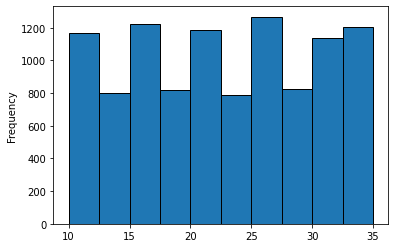

In [6]:
#plot distribution of values in points column using histogram
print("\n" + "Distribution of values in age of asthma patients"+ "\n")
df_asthma_profile['age'].plot(kind='hist', edgecolor='black')

#### Let's create different distribution

In [7]:
df_asthma = df_profile[(df_profile['disease'] == 'asthma')]

print("People who have Asthma:", df_asthma.shape)
print()
df_asthma.reset_index(drop=True, inplace=True)
print(df_asthma)

People who have Asthma: (20198, 5)

            name  age disease               city last_tested
0           John   52  asthma           Adelaide  2022-09-17
1       Patricia   49  asthma     SouthAustralia  2022-09-26
2      Juan Luis   23  asthma  NorthernTerritory  2022-06-12
3          Ahmed   46  asthma     SouthAustralia  2022-03-04
4          Ahmed   29  asthma   WesternAustralia  2022-04-23
...          ...  ...     ...                ...         ...
20193       Mary   53  asthma     SouthAustralia  2022-02-26
20194   Patricia   30  asthma     SouthAustralia  2022-07-23
20195       Mary   51  asthma  NorthernTerritory  2022-09-16
20196      Linda   46  asthma           Canberra  2022-11-19
20197    Michael   15  asthma           Canberra  2022-11-23

[20198 rows x 5 columns]


People who have Asthma: 20198

Min Age have Asthma: 10
Max age have Asthma: 59



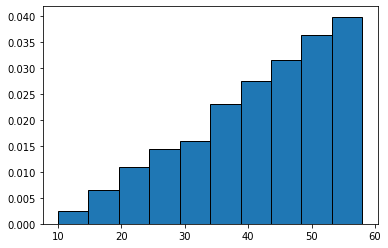

In [8]:
print("People who have Asthma:", df_asthma.shape[0])
print()
print("Min Age have Asthma:", df_asthma['age'].min())
print("Max age have Asthma:", df_asthma['age'].max())
print()
gfg = np.random.triangular(df_asthma['age'].min(), df_asthma['age'].max(), df_asthma['age'].max(), df_asthma.shape[0])
gfg = gfg.astype(int)
import matplotlib.pyplot as plt
plt.hist(gfg, bins = 10, density = True, edgecolor='black')
plt.show()

### Now we see Min Age have Asthma: 10 and Max age have Asthma: 59, with this the distribution is triangular.